## Bernstein Usage Examples

This notebook follows closely the structure of the [Chebyshev](https://github.com/pavelkomarov/spectral-derivatives/blob/main/notebooks/chebyshev.ipynb) and [Legendre](https://github.com/pavelkomarov/spectral-derivatives/blob/main/notebooks/legendre.ipynb) notebooks, so I've left out commentary.

In [1]:
import sys; sys.path.append('../specderiv')
from specderiv import bern_deriv
import numpy as np
from matplotlib import pyplot

In [2]:
y = lambda t: np.exp(t) * np.sin(5*t)
dy = lambda t: np.exp(t) * (5*np.cos(5*t) + np.sin(5*t))
d2y = lambda t: 2*np.exp(t) * (5*np.cos(5*t) - 12*np.sin(5*t))
d3y = lambda t: -2*np.exp(t) * (37*np.sin(5*t) + 55*np.cos(5*t))
d4y = lambda t: 4*np.exp(t) * (119*np.sin(5*t) - 120*np.cos(5*t))
d5y = lambda t: 4*np.exp(t) * (719*np.sin(5*t) + 475*np.cos(5*t))
d6y = lambda t: 8*np.exp(t) * (2035*np.cos(5*t) - 828*np.sin(5*t))

In [3]:
N = 20

t = np.linspace(-1, 1, endpoint=True)
t_n = np.linspace(-1, 1, N+1, endpoint=True)

In [4]:
y_n = y(t_n)
dy_n = bern_deriv(y_n, t_n, 1)
d2y_n = bern_deriv(y_n, t_n, 2)
d3y_n = bern_deriv(y_n, t_n, 3)
d4y_n = bern_deriv(y_n, t_n, 4)
d5y_n = bern_deriv(y_n, t_n, 5)
d6y_n = bern_deriv(y_n, t_n, 6)

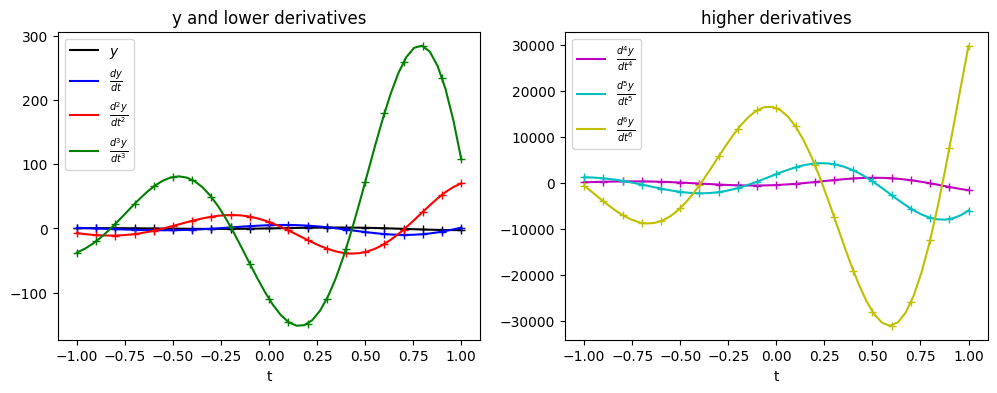

In [5]:
fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(t, y(t), 'k', label="$y$")
axes[0].plot(t_n, y_n, 'k+')
axes[0].plot(t, dy(t), 'b', label=r"$\frac{dy}{dt}$")
axes[0].plot(t_n, dy_n, 'b+')
axes[0].plot(t, d2y(t), 'r', label=r"$\frac{d^2y}{dt^2}$")
axes[0].plot(t_n, d2y_n, 'r+')
axes[0].plot(t, d3y(t), 'g', label=r"$\frac{d^3y}{dt^3}$")
axes[0].plot(t_n, d3y_n, 'g+')
axes[0].set_title("y and lower derivatives")
axes[0].set_xlabel('t')
axes[0].legend()
axes[1].plot(t, d4y(t), 'm', label=r"$\frac{d^4y}{dt^4}$")
axes[1].plot(t_n, d4y_n, 'm+')
axes[1].plot(t, d5y(t), 'c', label=r"$\frac{d^5y}{dt^5}$")
axes[1].plot(t_n, d5y_n, 'c+')
axes[1].plot(t, d6y(t), 'y', label=r"$\frac{d^6y}{dt^6}$")
axes[1].plot(t_n, d6y_n, 'y+')
axes[1].set_title("higher derivatives")
axes[1].set_xlabel('t')
axes[1].legend();

In [6]:
for i,(df,computed) in enumerate(zip([dy, d2y, d3y, d4y, d5y, d6y], [dy_n, d2y_n, d3y_n, d4y_n, d5y_n, d6y_n])):
	print("%sth derivative MSE:" % (i+1), np.mean((df(t_n) - computed)**2))

1th derivative MSE: 3.0003501180001535e-15
2th derivative MSE: 1.556326038286924e-11
3th derivative MSE: 3.494360050143855e-08
4th derivative MSE: 4.884007810737048e-05
5th derivative MSE: 0.04795057070916007
6th derivative MSE: 34.96825095766672


In [7]:
T1, T2 = np.meshgrid(t, t) # a 100 x 100 grid
T1_n, T2_n = np.meshgrid(t_n, t_n)

y2 = T1**2 * np.sin(3/2*np.pi*T2)
y2_n = T1_n**2 * np.sin(3/2*np.pi*T2_n) # y2 sampled


In [8]:
dx1dx2y = 3*T1*np.pi*np.cos(3/2*np.pi*T2) # d^2 / dx_1 dx_2
Laplacian = 2*np.sin(3/2*np.pi*T2) - 9/4*np.pi**2 * T1**2 * np.sin(3/2*np.pi*T2)

d2y2_n = bern_deriv(bern_deriv(y2_n, t_n, 1, axis=0), t_n, 1, axis=1) # One-lineable!
Laplacian_n = bern_deriv(y2_n, t_n, 2, axis=0) + bern_deriv(y2_n, t_n, 2, axis=1) # One-lineable!

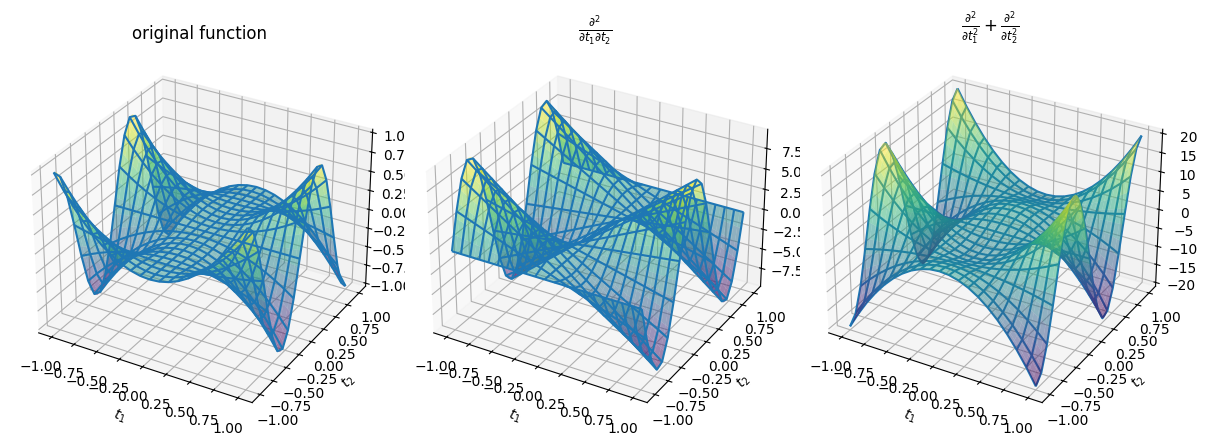

In [9]:
def plot_3d(F_n, L_n): # Put in a function, because I'll have to call this more than once.
	fig = pyplot.figure(figsize=(12, 5))
	ax1 = fig.add_subplot(1, 3, 1, projection='3d')
	ax1.plot_surface(T1, T2, y2, cmap='viridis', alpha=0.5)
	ax1.set_title('original function')
	ax1.set_xlabel(r'$t_1$')
	ax1.set_ylabel(r'$t_2$')
	ax2 = fig.add_subplot(1, 3, 2, projection='3d')
	ax2.plot_surface(T1, T2, dx1dx2y, cmap='viridis', alpha=0.5)
	ax2.set_title(r'$\frac{\partial^2}{\partial t_1 \partial t_2}$')
	ax2.set_xlabel(r'$t_1$')
	ax2.set_ylabel(r'$t_2$')
	ax3 = fig.add_subplot(1, 3, 3, projection='3d')
	ax3.plot_surface(T1, T2, Laplacian, cmap='viridis', alpha=0.5)
	ax3.set_title(r'$\frac{\partial^2}{\partial t_1^2} + \frac{\partial^2}{\partial t_2^2}$')
	ax3.set_xlabel(r'$t_1$')
	ax3.set_ylabel(r'$t_2$')

	ax1.plot_wireframe(T1_n, T2_n, y2_n)
	ax2.plot_wireframe(T1_n, T2_n, F_n)
	ax3.plot_wireframe(T1_n, T2_n, L_n)

	pyplot.tight_layout()

plot_3d(d2y2_n, Laplacian_n)